<a href="https://colab.research.google.com/github/Loverzzz/E-commerceSales/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_ReynaldoABT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/E-CommerceSales/data.csv', encoding='ISO-8859-1')  # Ganti dengan path file Anda
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Mengambil 2000 baris secara acak
data_sampled = data.sample(n=2000, random_state=42)
print(data_sampled.head())

       InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
209268    6/1/2011 12:05       0.85     17315.0  United Kingdom  
207108   5/27/2011 17:14       6.95     14031.0  United Kingdom  
167085   4/21/2011 17:05       0.65     14031.0  United Kingdom  
471836  11/16/2011 10:39       1.95     17198.0  United Kingdom  
115865    3/10/2011 8:40       9.95     13502.0  United Kingdom  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Memahami Struktur Data
print("Jumlah baris dan kolom:", data_sampled.shape)
print("Jenis data di setiap kolom:\n", data_sampled.dtypes)

Jumlah baris dan kolom: (2000, 8)
Jenis data di setiap kolom:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
# Menangani Data yang Hilang
missing_values = data_sampled.isnull().sum()
print("Data yang hilang:\n", missing_values[missing_values > 0])

# Contoh penanganan missing values
# data.fillna(data.mean(), inplace=True)  # Mengisi dengan rata-rata untuk kolom numerikal
data.dropna(inplace=True)  # Atau hapus baris dengan missing values

Data yang hilang:
 Description      3
CustomerID     514
dtype: int64


In [ ]:
# Menangani Data yang Hilang
missing_values = data.isnull().sum()
print("Data yang hilang:\n", missing_values[missing_values > 0])

Data yang hilang:
 Series([], dtype: int64)


           Quantity     UnitPrice    CustomerID      Cluster          PCA1  \
count  1.486000e+03  1.486000e+03   1486.000000  1486.000000  1.486000e+03   
mean   2.390790e-17  1.195395e-18  15198.157470     0.002019 -2.390790e-18   
std    1.000337e+00  1.000337e+00   1724.795246     0.057991  1.022069e+00   
min   -2.641007e+01 -4.483601e-01  12347.000000     0.000000 -2.323734e+01   
25%   -1.761099e-01 -2.745620e-01  13792.000000     0.000000 -1.655363e-01   
50%   -1.178984e-01 -1.705803e-01  15039.000000     0.000000  5.589560e-02   
75%    1.792829e-02  9.680139e-02  16741.000000     0.000000  2.068219e-01   
max    1.918890e+01  3.262823e+01  18283.000000     2.000000  1.370602e+01   

              PCA2  
count  1486.000000  
mean      0.000000  
std       0.978121  
min     -18.983375  
25%      -0.242783  
50%      -0.121728  
75%       0.056245  
max      22.905956  


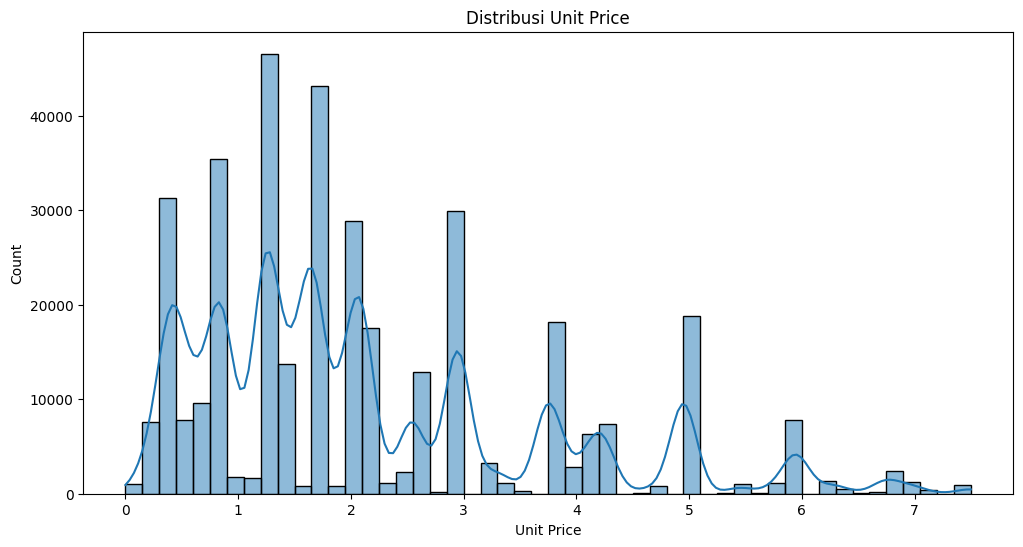

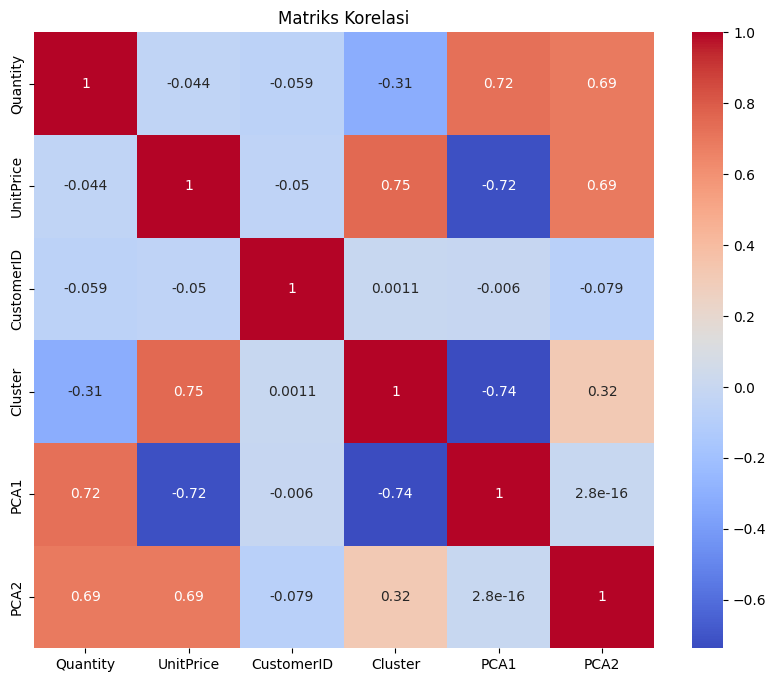

In [ ]:
# Analisis Distribusi dan Korelasi
numerical_cols = data_sampled.select_dtypes(include=[np.number])
categorical_cols = data_sampled.select_dtypes(include=[object])

# Statistik deskriptif untuk variabel numerik
print(numerical_cols.describe())

# Mengidentifikasi dan menghapus outlier
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
data_filtered = data[(data['UnitPrice'] >= lower_bound) & (data['UnitPrice'] <= upper_bound)]

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 6))
sns.histplot(data_filtered['UnitPrice'], bins=50, kde=True)
plt.title('Distribusi Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

# Korelasi antar variabel
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Menghapus atau Menangani Data Kosong (Missing Values)
data_sampled.dropna(inplace=True)

# Menghapus Data Duplikat
data_sampled.drop_duplicates(inplace=True)

# Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
data_sampled[['Quantity', 'UnitPrice']] = scaler.fit_transform(data_sampled[['Quantity', 'UnitPrice']])

# Encoding Data Kategorikal
data_sampled = pd.get_dummies(data_sampled, columns=['Country'], drop_first=True)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Memilih algoritma clustering yang sesuai
kmeans = KMeans(n_clusters=3, random_state=42)
data_sampled['Cluster'] = kmeans.fit_predict(data_sampled[['Quantity', 'UnitPrice']])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

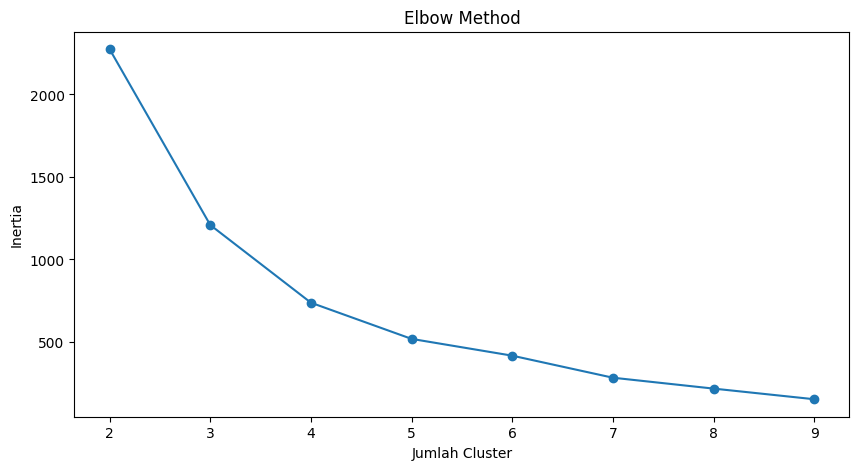

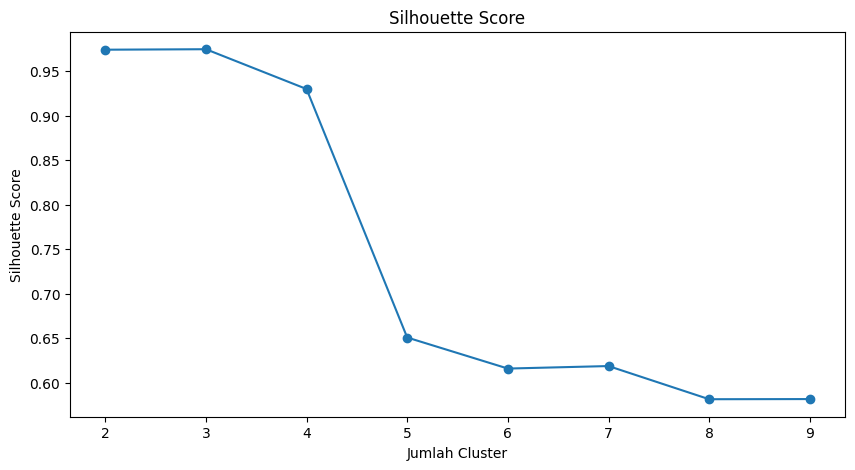

In [ ]:
# Evaluasi Model Clustering
inertia = []
silhouette_scores = []

for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_sampled[['Quantity', 'UnitPrice']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_sampled[['Quantity', 'UnitPrice']], kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

## **c. Feature Selection (Opsional)** tidak menggunakan ini

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

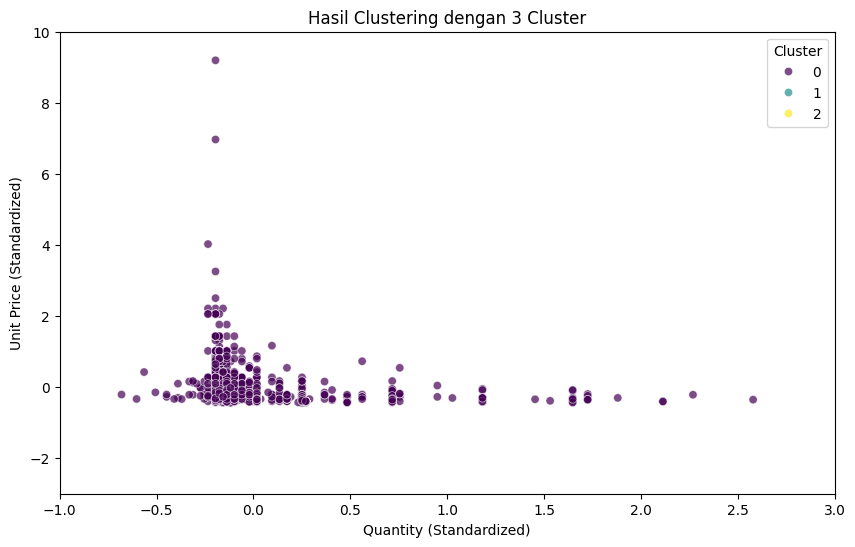

In [ ]:
# Visualisasi Hasil Clustering dengan Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_sampled, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Hasil Clustering dengan 3 Cluster')
plt.xlabel('Quantity (Standardized)')
plt.ylabel('Unit Price (Standardized)')
plt.xlim(-1, 3)  # Mengatur batas sumbu x
plt.ylim(-3, 10)  # Mengatur batas sumbu y
plt.legend(title='Cluster')
plt.show()

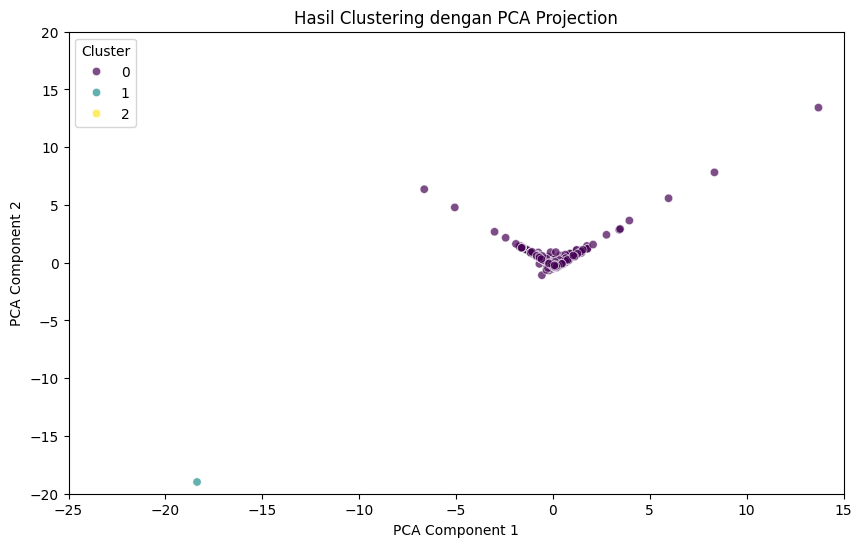

In [27]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_sampled[['Quantity', 'UnitPrice']])

# Menambahkan hasil PCA ke DataFrame
data_sampled['PCA1'] = pca_result[:, 0]
data_sampled['PCA2'] = pca_result[:, 1]

# Visualisasi Hasil Clustering dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_sampled, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Hasil Clustering dengan PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(-25, 15)  # Mengatur batas sumbu x
plt.ylim(-20, 20)  # Mengatur batas sumbu y
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [29]:
# Analisis karakteristik tiap cluster
for i in range(3):
    print(f"Cluster {i}:")
    print(data_sampled[data_sampled['Cluster'] == i].describe())

Cluster 0:
          Quantity    UnitPrice    CustomerID  Cluster         PCA1  \
count  1484.000000  1484.000000   1484.000000   1484.0  1484.000000   
mean      0.017954    -0.021693  15197.114555      0.0     0.028035   
std       0.728930     0.532497   1723.897922      0.0     0.673561   
min      -1.165704    -0.448360  12347.000000      0.0    -6.640240   
25%      -0.176110    -0.274562  13789.250000      0.0    -0.165536   
50%      -0.117898    -0.170580  15039.000000      0.0     0.055896   
75%       0.017928     0.096801  16733.000000      0.0     0.206822   
max      19.188899     9.195204  18283.000000      0.0    13.706025   

              PCA2  
count  1484.000000  
mean     -0.002643  
std       0.601005  
min      -1.080394  
25%      -0.242783  
50%      -0.121728  
75%       0.056245  
max      13.431176  
Cluster 1:
        Quantity  UnitPrice  CustomerID  Cluster       PCA1       PCA2
count   1.000000   1.000000         1.0      1.0   1.000000   1.000000
mean  -

Tulis hasil interpretasinya di sini.
1. Cluster 1:
Jumlah Data: Terdapat 1484 entri dalam cluster ini.
Quantity:
  - Rata-rata: 0.018, menunjukkan bahwa sebagian besar transaksi memiliki jumlah yang mendekati rata-rata.
  - Rentang: Dari -1.17 hingga 19.19, menunjukkan adanya variasi yang cukup besar dalam jumlah produk yang dibeli.
Unit Price:
  - Rata-rata: -0.022, menunjukkan bahwa harga unit rata-rata sedikit di bawah rata-rata setelah standarisasi.
  - Rentang: Dari -0.45 hingga 9.20, menunjukkan bahwa ada beberapa produk dengan harga yang sangat tinggi.
CustomerID: Rata-rata customer ID adalah 15197, menunjukkan bahwa pelanggan dalam cluster ini berasal dari berbagai ID pelanggan.
PCA:
  - PCA1 dan PCA2 menunjukkan bahwa data dalam cluster ini terdistribusi dengan baik di ruang dimensi yang lebih rendah.

  Cluster 0 tampaknya merupakan kelompok pelanggan yang melakukan pembelian dengan jumlah yang bervariasi, tetapi dengan harga unit yang relatif rendah. Ini mungkin mencerminkan pelanggan yang membeli produk dalam jumlah kecil atau produk dengan harga lebih terjangkau.

2. Cluster 2:
Jumlah Data: Terdapat 1 entri dalam cluster ini.
Quantity:
  - Rata-rata: -26.41, menunjukkan bahwa entri ini memiliki jumlah yang sangat rendah, mungkin merupakan outlier.
Unit Price:
  - Rata-rata: -0.436, menunjukkan harga unit yang rendah.
CustomerID:
  - Rata-rata: 18133, menunjukkan bahwa ini adalah pelanggan tertentu.
PCA:
  - PCA1 dan PCA2 menunjukkan nilai yang sangat rendah, menunjukkan bahwa data ini mungkin terpisah jauh dari cluster lainnya.

Cluster 1 tampaknya merupakan outlier atau entri yang tidak biasa, dengan jumlah yang sangat rendah dan harga unit yang juga rendah. Ini mungkin mencerminkan kesalahan dalam data atau transaksi yang tidak biasa.

3. Cluster 3:
Jumlah Data: Terdapat 1 entri dalam cluster ini.
Quantity:
  - Rata-rata: -0.234, menunjukkan bahwa entri ini juga memiliki jumlah yang rendah.
Unit Price:
  - Rata-rata: 32.63, menunjukkan harga unit yang sangat tinggi.
CustomerID:
  - Rata-rata: 13811, menunjukkan bahwa ini adalah pelanggan tertentu.
PCA:
  - PCA1 dan PCA2 menunjukkan nilai yang sangat tinggi, menunjukkan bahwa data ini juga terpisah jauh dari cluster lainnya.

  Cluster 2 juga tampaknya merupakan outlier, tetapi dengan harga unit yang sangat tinggi. Ini mungkin mencerminkan transaksi yang sangat besar atau produk premium yang dibeli oleh pelanggan tertentu.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [30]:
# Mengeksport Data
data_sampled.to_csv('/content/drive/MyDrive/E-CommerceSales/clustered_data.csv', index=False)